# Data Augmentation using Keras

In this notebook, we perform various types of data augmentation using Keras' image data processing API:
https://keras.io/api/preprocessing/image/

More specifically, we use Kears' **ImageDataGenerator** class that enables to perform various augmentations including standardization, rotation, shifts, flips, brightness change.
https://keras.io/api/preprocessing/image/#imagedatagenerator-class


## How does the ImageDataGenerator class work

An **ImageDataGenerator** object provides real-time data augmentation, i.e., it generates augmented images **on the fly** while the model is still in the training stage. Essentially it intercepts the original data, randomly transforms it, then returns the augmented data for training. It works in following 3 stages.

- An input batch of images is fed to the ImageDataGenerator object.
- It transforms each image in the batch by a series of random translations, rotations, etc.
- The randomly transformed batch is then returned to the calling function.


Note that, it only returns the augmented images without adding those to the original training/validation dataset. It loads the images in batches which saves a lot of memory.



## ImageDataGenerator: Methods

There are 3 methods that are useful depending on how we want to read data (images) by the **ImageDataGenerator** object:
- flow: Takes data & label arrays, generates batches of augmented data.
- flow_from_dataframe: Takes the dataframe and the path to a directory + generates batches. The generated batches contain augmented/normalized data.
- flow_from_directory: Takes the path to a directory & generates batches of augmented data.

In this demo, we will use the **flow** method. We need to set the following 3 arguments:

- x: Input data. Numpy array of rank 4 (sample size, height, width, channel). In case of grayscale data, the channels axis of the image array should have value 1, in case of RGB data, it should have value 3, and in case of RGBA data, it should have value 4.
- y: Labels.
- batch_size: Int (default: 32).

The "flow" method returns an **Iterator** yielding tuples of (x, y) where x is a numpy array of **augmented** image data (in the case of a single image input) or a list of numpy arrays (in the case with additional inputs) and y is a numpy array of corresponding labels.




## How to use ImageDataGenerator to train a Keras Neural Network model

Generally we train a Keras NN model using its **fit** method. The "fit" method is suitable when the training data is **static** and can be stored in the memory.

However, with the ImageDataGenerator object we transform the training data and create batches of augmented data on the fly. Hence the training data is **dynamic**. 

The "fit", when used with the dynamic data (created by the ImageDataGenerator object), acts like a Python generator. It assumes there is an underlying function that is generating the data for it.

- Keras calls the generator function supplied to "fit" method (i.e., the iterator returned by the ImageDataGenerator object).

- This method accepts the batch of data, performs backpropagation, and updates the weights in the model.

- This process is repeated until we have reached the desired number of epochs.

- We need to set the "steps_per_epoch" argument, which is given by: total number of training data points divided by the mini batch size. This argument tells the iterator when to quit, i.e., when all epochs are complete.




## Augmentation Tasks in this Notebook

Following augmentation tasks are performed.

- Horizontal and Vertical Shift 
- Horizontal and Vertical Flip
- Random Rotation
- Random Brightness 
- Random Zoom 
- Rescale the Image
- Random Crop


In [1]:
import numpy as np
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline


from pylab import *

## Load an Image for the Demo

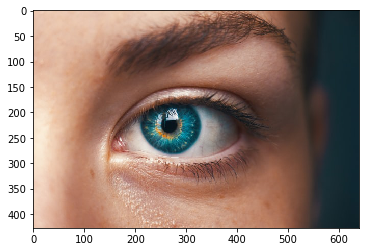

In [2]:
# load the image
img = load_img('/Users/hasan/datasets/pics/Eye.jpg')
imshow(img, cmap='gray')
show()

## Horizontal and Vertical Shift Augmentation

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

It has two implications: 
- Some of the pixels will be clipped off the image.
- There will be a region of the image where new pixel values will have to be specified.


The amount of horizontal and vertical shift are controlled by the following arguments of ImageDataGenerator:
- width_shift_range
- height_shift_range 

These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the width or height of the image to shift. 

Alternately, a number of pixels can be specified to shift the image. Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for each image and the shift performed, e.g., [0, value]. Alternately, you can specify a tuple or array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

The example below demonstrates a horizontal shift with the width_shift_range argument between [-200,200] pixels and generates a plot of generated images to demonstrate the effect.

Shape of the original array:  (427, 640, 3)
Shape of the expanded array along axis 0:  (1, 427, 640, 3)
Iterator:  1


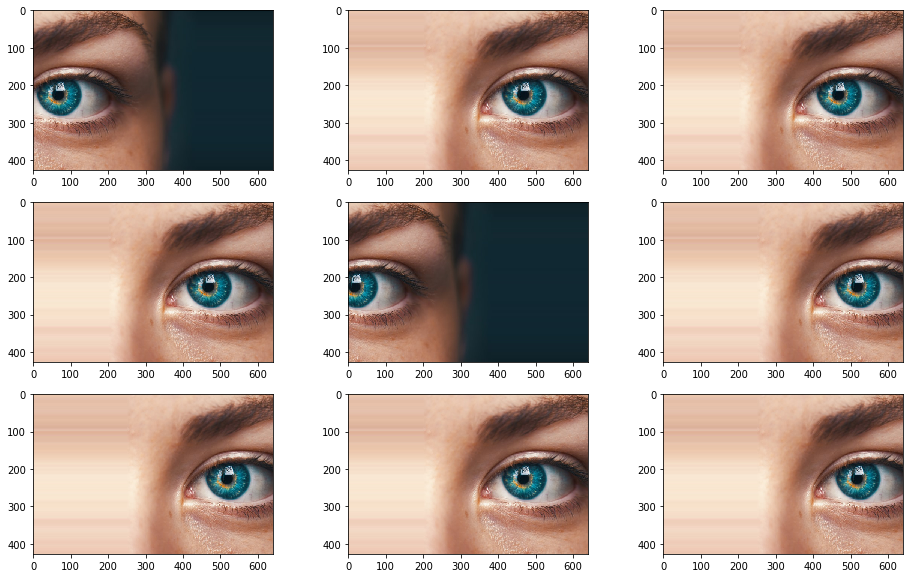

In [3]:
# Convert the image to a numpy array
data = img_to_array(img)

print("Shape of the original array: ", data.shape)

'''
The ImageDataGenerator class's "flow" method requires us to pass a 4D tensor as input. 
The first dimension should be number of samples, followed by height, width, and channels. 

In this demo, since we are using a single image,
we need to add an extra axis at the beginning of the 3D image to convert it into a 4D tensor.

We do this by expanding dimension to one sample by using the NumPy "expand_dims" function.

This function expands the array by inserting a new axis at the specified position. 
Two parameters are required by this function: Input array, position where new axis to be inserted

'''
samples = expand_dims(data, axis=0)
print("Shape of the expanded array along axis 0: ", samples.shape)


'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(width_shift_range=[200,250])


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

print("Iterator: ", len(it))

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Perform Vertical Shifts of the Image  

We use the height_shift_range argument, in this case specifying the percentage of the image to shift as 0.5 the height of the image.

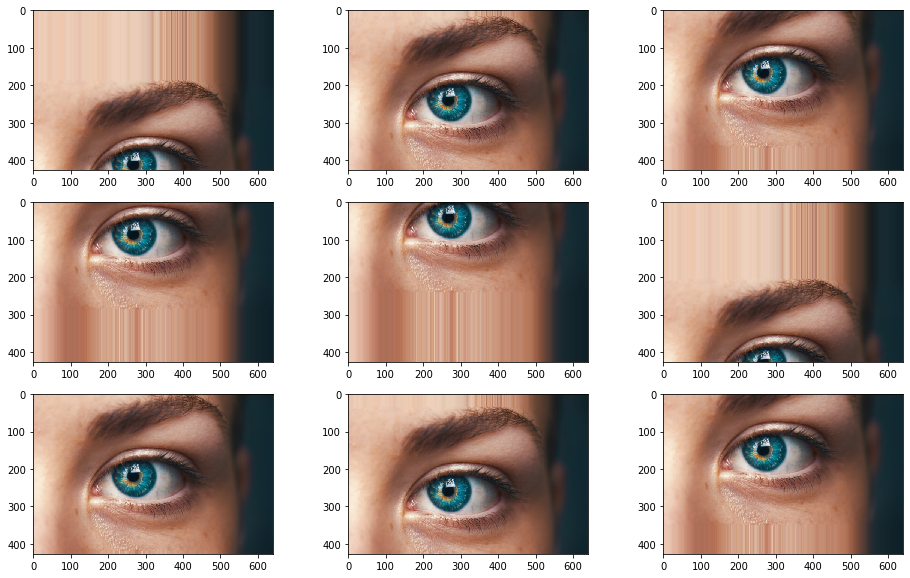

In [4]:
'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(height_shift_range=0.5)


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Horizontal and Vertical Flip Augmentation

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor. 

For images like the bird image used in this notebook, horizontal flips may make sense, but vertical flips would not. For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps vertical flips make sense.

The example below demonstrates augmenting the chosen image with horizontal flips via the horizontal_flip argument.

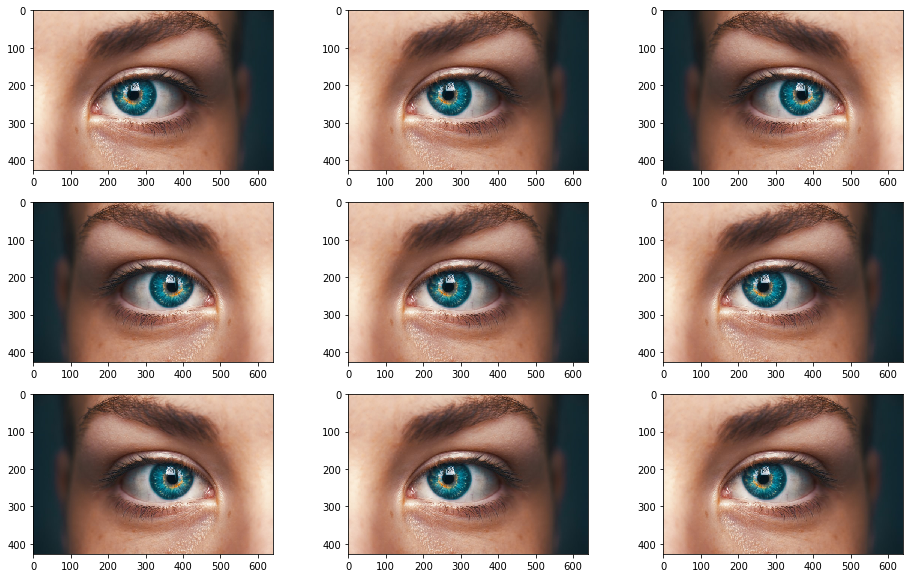

In [5]:
'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(horizontal_flip=True)


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

The example below demonstrates random rotations via the rotation_range argument, with rotations to the image between 0 and 90 degrees.

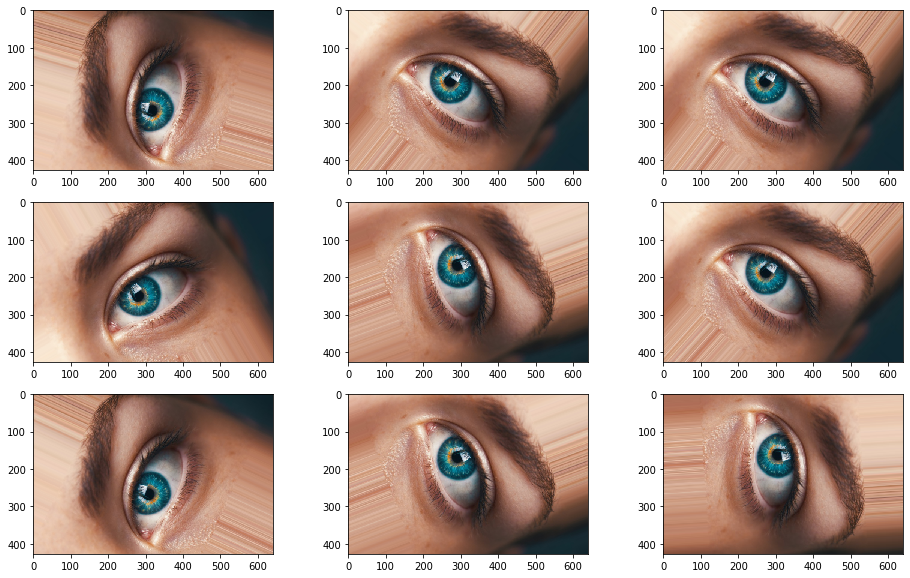

In [6]:
'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(rotation_range=90)


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

The intent is to allow a model to generalize across images trained on different lighting levels.

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g., [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g., [1.0, 1.5], where 1.0 has no effect on brightness.

The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.

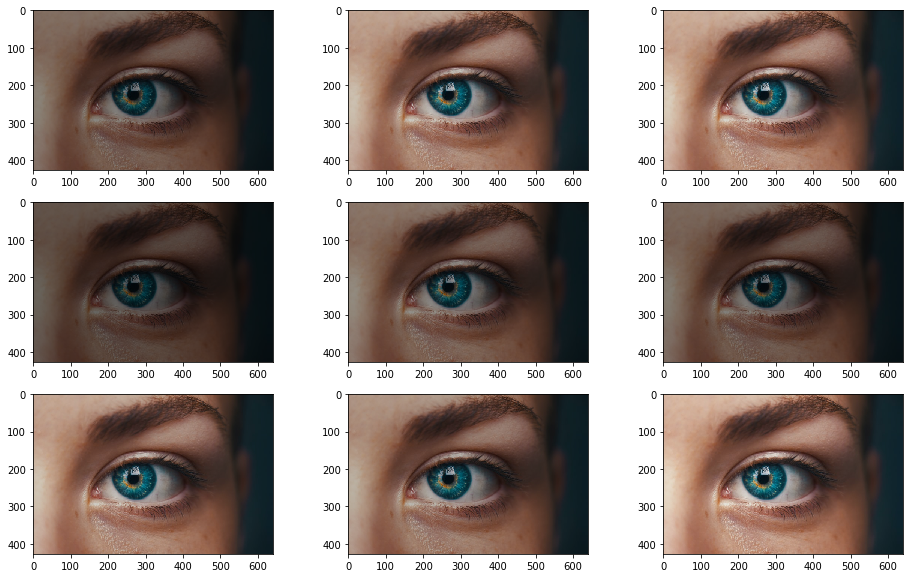

In [7]:
'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(brightness_range=[0.4,1.0])


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Random Zoom Augmentation

A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. We can specify the percentage of the zoom as a single float or a range as an array or tuple.

If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if we specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).

The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

The zoom **may not feel intuitive**. Note that zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further away. A zoom of [1.0,1.0] has no effect.

The example below demonstrates zooming the image in, e.g., making the object in the image larger.

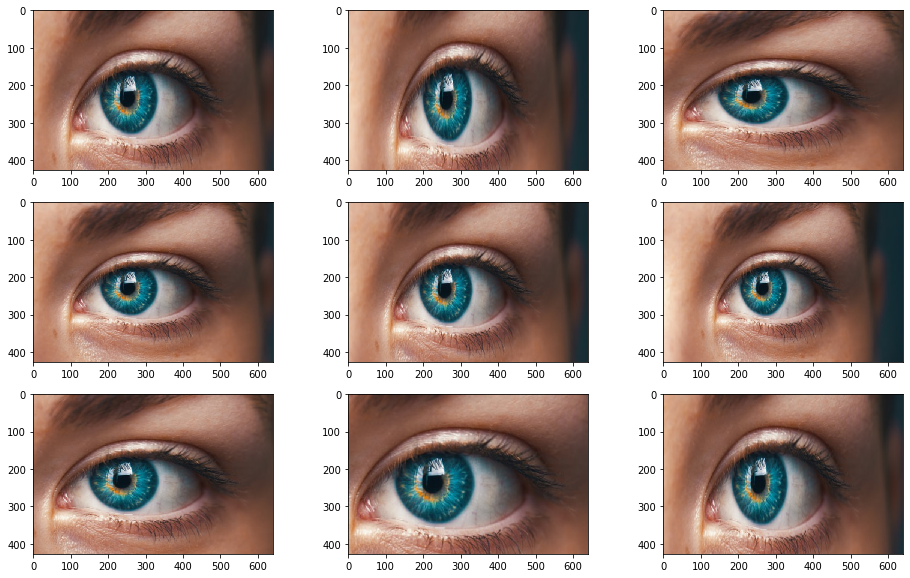

In [8]:
'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Rescale the Image 

Rescaling can be done by using the "rescale" argument.

The rescaling factor defaults to None. 
- If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

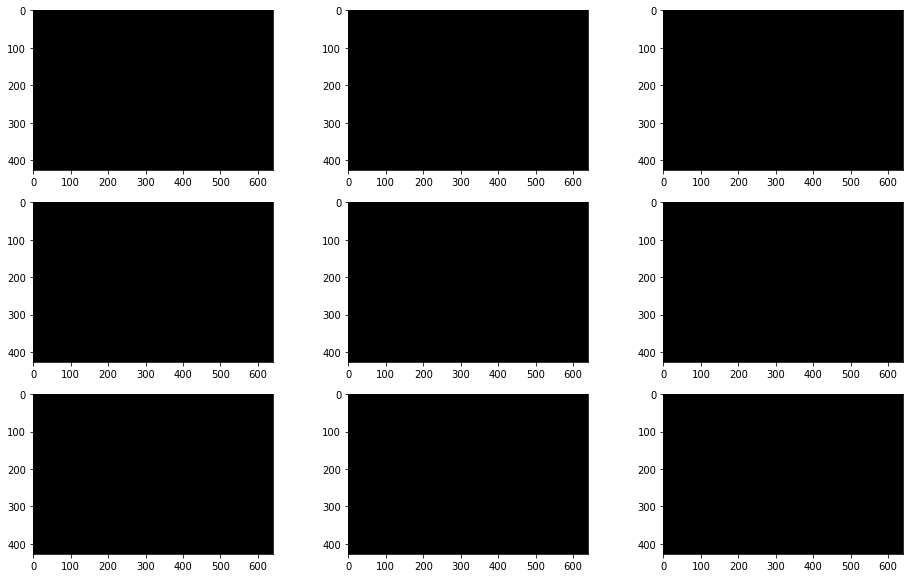

In [9]:
'''
Create an image data augmentation generator object
It performs a horizontal shift using the width_shift_range argument.
We specify the shift range between [-200,200] pixels along horizontal direction.
Images will be sampled withing this shift range

'''
datagen = ImageDataGenerator(rescale = 1./255)


'''
Create an iterator object that takes data and label arrays, batch size.
It returns an iterator yielding tuples of (x, y) 
where x is a numpy array of image data (in the case of a single image input) 
or a list of numpy arrays (in the case with additional inputs) and 
y is a numpy array of corresponding labels. 
'''
it = datagen.flow(x=samples, y=None, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(16,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    
plt.show()

## Randomly Crop a Image

We write a function to perform random cropping.

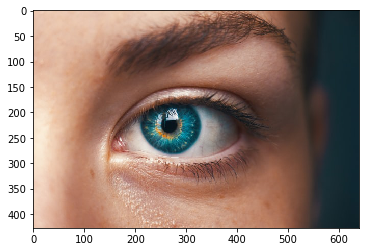

Shape of the original image: (427, 640, 3)
Shape of the cropped image: (260, 300, 3)


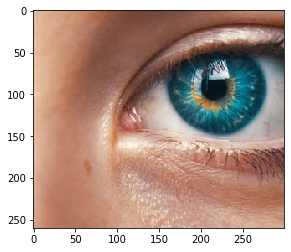

In [10]:
# load the image
imshow(img, cmap='gray')
show()

img_data = img_to_array(img)

print("Shape of the original image:", img_data.shape)


'''
The "random_crop_size" argument provides the size of the cropped image

'''
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


img_cropped = random_crop(img_data, (260, 300))

print("Shape of the cropped image:", img_cropped.shape)

imshow(array_to_img(img_cropped), cmap='gray')
show()